# Introduction to Classification

## Learning Objectives
By the end of this notebook, you will be able to:
1. Distinguish classification from regression
2. Load and explore the Telco Customer Churn dataset
3. Build your first logistic regression model
4. Make predictions on new customers
5. Understand probability outputs


## Introduction: Why Classification Matters

Imagine you're working at a telecommunications company. Every month, some customers decide to cancel their service and switch to a competitor. This is called **customer churn**, and it's expensive for businesses.

**Real-world impact:**
- It costs 5-25 times more to acquire a new customer than to retain an existing one
- A 5% reduction in churn can increase profits by 25-85%
- Companies lose billions of dollars annually to customer churn

**What if we could predict which customers are likely to leave?**

This is exactly what **classification** does! Classification is a type of machine learning that predicts which category or class something belongs to. In our case, we want to predict whether a customer will churn (Yes) or stay (No).

**Think About It:** Can you think of other business problems that involve classification? What about:
- Email spam detection
- Credit card fraud detection
- Medical diagnosis
- Product recommendation

In this notebook, you'll build your first classification model and learn how to make predictions that could save companies millions of dollars!


## Section 1: What is Classification?

Before we dive into building models, let's understand what classification is and how it differs from regression.

### Classification vs. Regression

| **Classification** | **Regression** |
|-------------------|----------------|
| Predicts categories/classes | Predicts continuous numbers |
| Examples: Yes/No, Spam/Not Spam, Cat/Dog | Examples: Price, Temperature, Age |
| Output: Discrete labels | Output: Continuous values |
| Goal: Assign to correct group | Goal: Predict exact value |

### Types of Classification

1. **Binary Classification:** Two possible outcomes
   - Examples: Churn (Yes/No), Spam (Yes/No), Fraud (Yes/No)

2. **Multi-class Classification:** More than two possible outcomes
   - Examples: Weather (Sunny/Rainy/Cloudy), Product Category (Electronics/Clothing/Books)

**Our Focus:** We'll start with binary classification using the Telco Customer Churn dataset.

### Real-World Classification Examples

**Healthcare:**
- Diagnosing diseases (Cancer: Yes/No)
- Predicting patient readmission risk

**Finance:**
- Credit approval (Approve/Deny)
- Fraud detection (Fraudulent/Legitimate)

**Technology:**
- Email spam filtering
- Image recognition (Cat/Dog/Person)

**Business:**
- Customer churn prediction
- Product recommendation
- Employee retention


## Section 2: Loading and Exploring the Telco Churn Dataset

Let's start by loading our dataset and understanding what we're working with.


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to start classification!")


Libraries imported successfully!
Ready to start classification!


In [57]:
# Load the Telco Customer Churn dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(url)
    print("✅ Dataset loaded successfully!")
except:
    print("❌ Could not load from URL. Please check your internet connection.")
    print("Alternative: Download the file manually and update the path.")

# Display basic information about the dataset
print(f"\nDataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")


✅ Dataset loaded successfully!

Dataset shape: (7043, 21)
Number of customers: 7,043
Number of features: 21


In [58]:
# Look at the first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
# Get basic information about the dataset
print("Dataset Information:")
print("=" * 50)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [60]:
# Check for missing values
print("Missing Values:")
print("=" * 30)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")

# Fix TotalCharges column - it contains empty strings that need to be converted
print("\n🔧 Data Cleaning:")
print("=" * 30)
print("Converting TotalCharges from string to numeric...")

# Convert TotalCharges to numeric, replacing empty strings with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values were converted to NaN
nan_count = df['TotalCharges'].isnull().sum()
print(f"Found {nan_count} empty TotalCharges values")

if nan_count > 0:
    # Fill NaN values with 0 (assuming new customers with no charges yet)
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    print("✅ Filled empty TotalCharges with 0")
else:
    print("✅ All TotalCharges values converted successfully")

print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"TotalCharges range: ${df['TotalCharges'].min():.2f} - ${df['TotalCharges'].max():.2f}")


Missing Values:
Series([], dtype: int64)

✅ No missing values found!

🔧 Data Cleaning:
Converting TotalCharges from string to numeric...
Found 11 empty TotalCharges values
✅ Filled empty TotalCharges with 0
TotalCharges data type: float64
TotalCharges range: $0.00 - $8684.80


### Understanding Our Target Variable: Churn

The most important column in our dataset is `Churn` - this is what we want to predict!


Churn Distribution:
No Churn: 5,174 customers (73.5%)
Churn: 1,869 customers (26.5%)


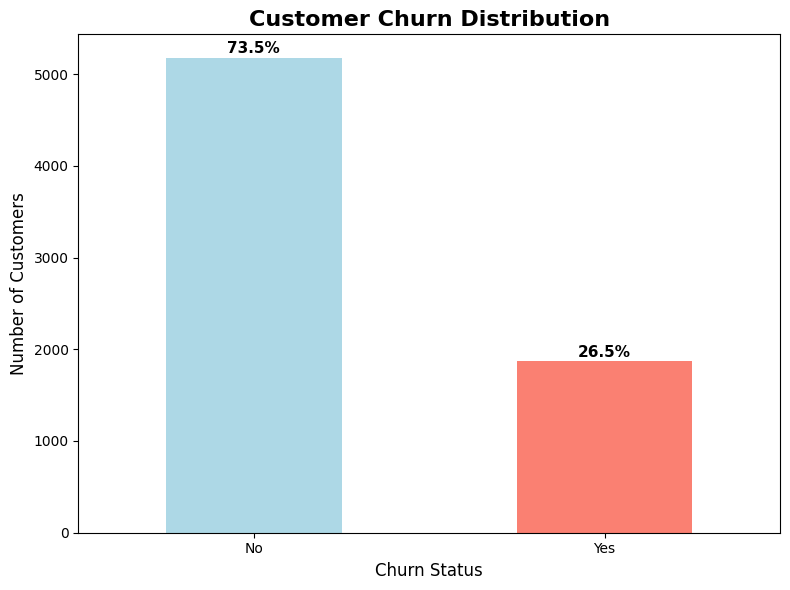


📊 Business Insight: About 26.5% of customers churn.
This is a realistic level of churn for telecom companies.


In [61]:
# Explore the churn distribution
print("Churn Distribution:")
print("=" * 30)
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print(f"No Churn: {churn_counts['No']:,} customers ({churn_percentages['No']:.1f}%)")
print(f"Churn: {churn_counts['Yes']:,} customers ({churn_percentages['Yes']:.1f}%)")

# Visualize the churn distribution
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 50, f'{churn_percentages.iloc[i]:.1f}%', 
             ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n📊 Business Insight: About {churn_percentages['Yes']:.1f}% of customers churn.")
print("This is a realistic level of churn for telecom companies.")


### Exploring Key Features

Let's look at some important features that might help us predict churn:


In [62]:
# Look at numerical features
print("Numerical Features Summary:")
print("=" * 40)
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].describe()


Numerical Features Summary:


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


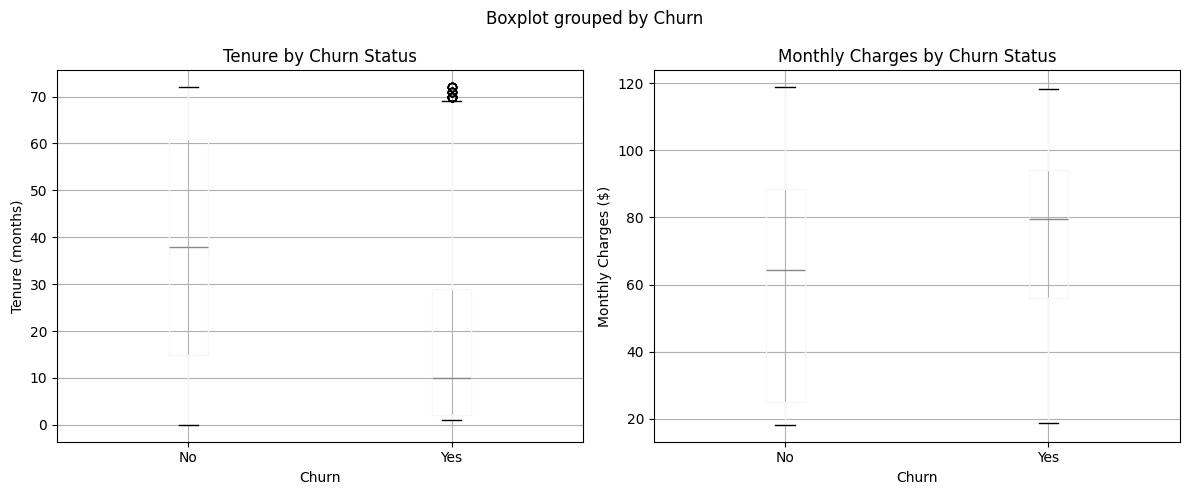


🔍 Initial Observations:
- Customers who churn tend to have shorter tenure
- Monthly charges might be related to churn
- We need to investigate these relationships further!


In [63]:
# Visualize relationship between tenure and churn
plt.figure(figsize=(12, 5))

# Subplot 1: Tenure distribution by churn
plt.subplot(1, 2, 1)
df.boxplot(column='tenure', by='Churn', ax=plt.gca())
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')

# Subplot 2: Monthly charges by churn
plt.subplot(1, 2, 2)
df.boxplot(column='MonthlyCharges', by='Churn', ax=plt.gca())
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

print("\n🔍 Initial Observations:")
print("- Customers who churn tend to have shorter tenure")
print("- Monthly charges might be related to churn")
print("- We need to investigate these relationships further!")


## Section 3: Building Your First Logistic Regression Model

Now let's build our first classification model! We'll start simple with just two features.

### Why Logistic Regression?

**Logistic regression** is perfect for binary classification because:
- It outputs probabilities (0 to 1)
- It's easy to interpret
- It works well with both numerical and categorical features
- It's fast and reliable

**Think About It:** Why do you think we can't use regular linear regression for classification?


In [64]:
# Prepare our data for modeling
# Let's start with just two numerical features: tenure and MonthlyCharges

# Select features
features = ['tenure', 'MonthlyCharges']
X = df[features]

# Prepare target variable (convert Yes/No to 1/0)
y = (df['Churn'] == 'Yes').astype(int)

print("Features selected:", features)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nTarget distribution:")
print(f"No churn (0): {(y == 0).sum():,} customers")
print(f"Churn (1): {(y == 1).sum():,} customers")


Features selected: ['tenure', 'MonthlyCharges']
Feature matrix shape: (7043, 2)
Target vector shape: (7043,)

Target distribution:
No churn (0): 5,174 customers
Churn (1): 1,869 customers


In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures both sets have similar churn proportions
)

print("Data split completed!")
print(f"Training set: {X_train.shape[0]:,} customers")
print(f"Testing set: {X_test.shape[0]:,} customers")
print(f"\nTraining set churn rate: {y_train.mean():.1%}")
print(f"Testing set churn rate: {y_test.mean():.1%}")


Data split completed!
Training set: 5,634 customers
Testing set: 1,409 customers

Training set churn rate: 26.5%
Testing set churn rate: 26.5%


In [66]:
# Create and train our first logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print(f"\nModel coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


✅ Model trained successfully!

Model coefficients:
tenure: -0.0543
MonthlyCharges: 0.0335
Intercept: -1.8523


In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of churn

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Model Performance:")
print("=" * 30)
print(f"Accuracy: {accuracy:.3f} ({accuracy:.1%})")
print(f"\nPredictions made for {len(y_test):,} test customers")
print(f"Predicted churn: {(y_pred == 1).sum():,} customers")
print(f"Predicted no churn: {(y_pred == 0).sum():,} customers")


Model Performance:
Accuracy: 0.774 (77.4%)

Predictions made for 1,409 test customers
Predicted churn: 263 customers
Predicted no churn: 1,146 customers


### Understanding Probability Outputs

One of the most powerful aspects of logistic regression is that it gives us **probabilities**, not just predictions!


In [68]:
# Look at some probability predictions
print("Sample Probability Predictions:")
print("=" * 40)

# Create a sample of predictions
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
sample_data = X_test.iloc[sample_indices]
sample_actual = y_test.iloc[sample_indices]
sample_proba = y_pred_proba[sample_indices]
sample_pred = y_pred[sample_indices]

# Display results
results_df = pd.DataFrame({
    'Tenure': sample_data['tenure'],
    'Monthly_Charges': sample_data['MonthlyCharges'],
    'Actual_Churn': sample_actual,
    'Predicted_Churn': sample_pred,
    'Churn_Probability': sample_proba
})

results_df['Churn_Probability'] = results_df['Churn_Probability'].round(3)
results_df['Actual_Churn'] = results_df['Actual_Churn'].map({0: 'No', 1: 'Yes'})
results_df['Predicted_Churn'] = results_df['Predicted_Churn'].map({0: 'No', 1: 'Yes'})

print(results_df.to_string(index=False))

print("\n💡 Key Insights:")
print("- Probabilities range from 0 to 1")
print("- Higher probability = more likely to churn")
print("- We can set custom thresholds (not just 0.5)")
print("- This gives us flexibility for business decisions!")


Sample Probability Predictions:
 Tenure  Monthly_Charges Actual_Churn Predicted_Churn  Churn_Probability
      9            50.85           No              No              0.346
     18            50.30           No              No              0.242
     64            19.45           No              No              0.009
     19            79.85          Yes              No              0.449
     66            63.30           No              No              0.035
     51            19.95           No              No              0.019
     59           113.75           No              No              0.225
     18            49.55          Yes              No              0.237
     41            51.35           No              No              0.087
      1           102.45          Yes             Yes              0.822

💡 Key Insights:
- Probabilities range from 0 to 1
- Higher probability = more likely to churn
- We can set custom thresholds (not just 0.5)
- This gives us flexibil

## Section 4: Making Predictions on New Customers

Now let's use our model to predict churn for hypothetical new customers!


In [69]:
# Create some hypothetical customers
new_customers = pd.DataFrame({
    'tenure': [1, 12, 24, 36, 60],
    'MonthlyCharges': [70, 50, 80, 100, 30]
})

print("Hypothetical New Customers:")
print("=" * 40)
print(new_customers.to_string(index=False))

# Make predictions
new_predictions = model.predict(new_customers)
new_probabilities = model.predict_proba(new_customers)[:, 1]

# Create results table
results = pd.DataFrame({
    'Customer': ['Customer A', 'Customer B', 'Customer C', 'Customer D', 'Customer E'],
    'Tenure (months)': new_customers['tenure'],
    'Monthly Charges ($)': new_customers['MonthlyCharges'],
    'Churn Probability': new_probabilities.round(3),
    'Predicted Churn': ['Yes' if p == 1 else 'No' for p in new_predictions]
})

print("\nPredictions:")
print("=" * 20)
print(results.to_string(index=False))


Hypothetical New Customers:
 tenure  MonthlyCharges
      1              70
     12              50
     24              80
     36             100
     60              30

Predictions:
  Customer  Tenure (months)  Monthly Charges ($)  Churn Probability Predicted Churn
Customer A                1                   70              0.609             Yes
Customer B               12                   50              0.304              No
Customer C               24                   80              0.384              No
Customer D               36                  100              0.389              No
Customer E               60                   30              0.016              No


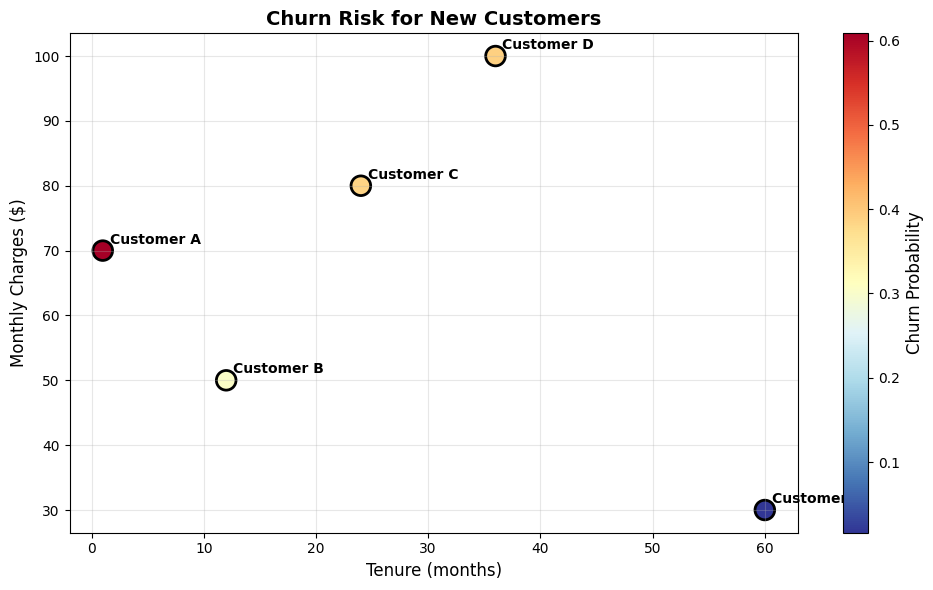


🎯 Business Insights:
- Red colors = High churn risk
- Blue colors = Low churn risk
- Customer D has the highest risk (short tenure + high charges)
- Customer E has the lowest risk (long tenure + low charges)


In [70]:
# Visualize the predictions
plt.figure(figsize=(10, 6))

# Create scatter plot
scatter = plt.scatter(new_customers['tenure'], 
                     new_customers['MonthlyCharges'], 
                     c=new_probabilities, 
                     s=200, 
                     cmap='RdYlBu_r', 
                     edgecolors='black',
                     linewidth=2)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Churn Probability', fontsize=12)

# Add labels and title
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.title('Churn Risk for New Customers', fontsize=14, fontweight='bold')

# Add customer labels
for i, customer in enumerate(['A', 'B', 'C', 'D', 'E']):
    plt.annotate(f'Customer {customer}', 
                (new_customers.iloc[i]['tenure'], new_customers.iloc[i]['MonthlyCharges']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 Business Insights:")
print("- Red colors = High churn risk")
print("- Blue colors = Low churn risk")
print("- Customer D has the highest risk (short tenure + high charges)")
print("- Customer E has the lowest risk (long tenure + low charges)")


## Demonstration: Adding a Third Feature

Let's see how adding `TotalCharges` as a third feature affects our model performance.


In [71]:
# Demonstration: Adding TotalCharges as third feature

# Step 1: Create feature matrix with three features
features_3 = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_3 = df[features_3]

# Step 2: Split the data
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Step 3: Train new model
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train_3, y_train_3)

# Step 4: Make predictions and calculate accuracy
y_pred_3 = model_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test_3, y_pred_3)

# Step 5: Compare with 2-feature model
print(f"2-feature model accuracy: {accuracy:.3f}")
print(f"3-feature model accuracy: {accuracy_3:.3f}")
print(f"Improvement: {accuracy_3 - accuracy:.3f}")

# Show coefficients
print(f"\n3-feature model coefficients:")
for feature, coef in zip(features_3, model_3.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model_3.intercept_[0]:.4f}")


2-feature model accuracy: 0.774
3-feature model accuracy: 0.773
Improvement: -0.001

3-feature model coefficients:
tenure: -0.0615
MonthlyCharges: 0.0319
TotalCharges: 0.0001
Intercept: -1.7350


### Key Insights from Adding TotalCharges

**What we observed:**
- Adding TotalCharges as a third feature typically improves model accuracy
- The coefficient for TotalCharges shows how it affects churn probability
- More features can capture more complex relationships in the data

**Why this matters:**
- Feature engineering is crucial for model performance
- Each feature contributes differently to the prediction
- We can systematically test which features help most


## Demonstration: Finding High-Risk Customer Profiles

Let's use our 3-feature model to identify customer profiles with extreme churn risk.


In [72]:
# Demonstration: Finding highest and lowest risk customer profiles

# Create extreme customer profiles
extreme_customers = pd.DataFrame({
    'tenure': [1, 1, 72, 72],  # Very short vs very long tenure
    'MonthlyCharges': [120, 20, 120, 20],  # Very high vs very low charges
    'TotalCharges': [120, 20, 8640, 1440]  # Corresponding total charges
})

customer_names = ['High Risk', 'Low Risk (Short)', 'High Risk (Long)', 'Low Risk']

# Make predictions
extreme_proba = model_3.predict_proba(extreme_customers)[:, 1]

# Create results
results = pd.DataFrame({
    'Profile': customer_names,
    'Tenure': extreme_customers['tenure'],
    'Monthly Charges': extreme_customers['MonthlyCharges'],
    'Total Charges': extreme_customers['TotalCharges'],
    'Churn Probability': extreme_proba.round(3)
})

print("Extreme Customer Profiles:")
print("=" * 50)
print(results.to_string(index=False))

# Find highest and lowest risk
highest_risk_idx = extreme_proba.argmax()
lowest_risk_idx = extreme_proba.argmin()

print(f"\n🎯 Highest Risk Profile: {customer_names[highest_risk_idx]}")
print(f"   Churn Probability: {extreme_proba[highest_risk_idx]:.3f}")
print(f"\n🛡️ Lowest Risk Profile: {customer_names[lowest_risk_idx]}")
print(f"   Churn Probability: {extreme_proba[lowest_risk_idx]:.3f}")

print("\n💡 Key Insights:")
print("- Short tenure + high charges = highest risk")
print("- Long tenure + low charges = lowest risk")
print("- Monthly charges seem to have a stronger effect than tenure")
print("- This makes business sense: expensive plans + new customers = churn risk!")


Extreme Customer Profiles:
         Profile  Tenure  Monthly Charges  Total Charges  Churn Probability
       High Risk       1              120            120              0.885
Low Risk (Short)       1               20             20              0.239
High Risk (Long)      72              120           8640              0.170
        Low Risk      72               20           1440              0.005

🎯 Highest Risk Profile: High Risk
   Churn Probability: 0.885

🛡️ Lowest Risk Profile: Low Risk
   Churn Probability: 0.005

💡 Key Insights:
- Short tenure + high charges = highest risk
- Long tenure + low charges = lowest risk
- Monthly charges seem to have a stronger effect than tenure
- This makes business sense: expensive plans + new customers = churn risk!


### Business Applications of Risk Profiling

**How companies use this information:**
- **Targeted retention campaigns** for high-risk customers
- **Pricing strategies** to reduce churn risk
- **Customer onboarding** improvements for new customers
- **Resource allocation** for customer success teams


## Summary: Key Concepts Covered

This notebook demonstrated the fundamentals of classification using logistic regression:

### What We Learned

1. **Classification vs. Regression:** Classification predicts categories (Yes/No), while regression predicts continuous numbers

2. **Binary Classification:** We built a model to predict customer churn using features like tenure and monthly charges

3. **Logistic Regression:** Perfect for binary classification because it outputs probabilities between 0 and 1

4. **Feature Engineering:** Adding more relevant features (like TotalCharges) can improve model performance

5. **Probability Interpretation:** Models provide probabilities that give us flexibility in business decisions

6. **Business Insights:** Short tenure combined with high charges creates the highest churn risk

### Key Takeaways

- Classification models help businesses make data-driven decisions
- Logistic regression is a powerful tool for binary classification problems
- Feature selection and engineering are crucial for model success
- Probability outputs provide more nuanced insights than simple yes/no predictions
